<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TRABALHANDO-COM-DADOS-02/blob/main/Gustavo_Bezerra_3_HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Despesas Médicas do Seguro de Saúde

Este conjunto de dados *insurance.csv* representa despesas médicas de indivíduos nos EUA.<br/>
Predizer despesas médicas é de fundamental importância para uma empresa de seguros de saúde. É tambem de interesse de cada pessoa.

#### Vamos realizar uma analise exploratória dos dados (EDA) utilizado o Seaborn


- age: idade do beneficiário primário.
- sex: empreiteiro de seguros gênero feminino, masculino.
- bmi: Índice de massa corporal (IMC),  a relação entre altura e peso é dada por (kg / m ^ 2), idealmente o valor deve ficar entre 18,5 a 24,9.
- children: Número de dependentes / Número de crianças cobertas pelo seguro de saúde.
- smoker: A pessoa é fumante ou não.
- region: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste e noroeste.
- expenses: custos médicos individuais faturados pelo seguro de saúde.

###Importe as bibliotecas que vamos precisar para gerar nossos gráficos, tabelas e insights

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###Carregue/Leia o DataFrame

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaacacio/Diabetes-Classification/main/insurance.csv')

###Mostre na tela as primeiras cinco linhas do dataframe

In [138]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


###Mostre na tela as informações gerais do dataframe

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

###Mostre na tela um resumo estatístico dos dados numéricos


In [141]:
#MOSTRANDO O RESUMO ESTATÍSTICO DOS DADOS NUMÉRICOS
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [142]:
#MOSTRANDO O RESUMO ESTATÍSTICO DOS DADOS CATEGORICOS
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


###Verifique os tipos de dados do dataset

In [143]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

###Elime as colunas irrelevantes, caso seja necessário

In [144]:
#MANEIRA PARA ELIMINAR DUAS COLUNAS AO MESMO TEMPO
df = df.drop(['children','region'], axis=1)
df.head()

,age,sex,bmi,smoker,expenses
0,19,female,27.9,yes,16884.92
1,18,male,33.8,no,1725.55
2,28,male,33.0,no,4449.46
3,33,male,22.7,no,21984.47
4,32,male,28.9,no,3866.86


In [35]:
#MANEIRA PARA ELIMINAR UMA UNICA COLUNA
df = df.drop(['region'], axis=1)
df.head(5)

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [36]:
#MANEIRA PARA ELIMINAR UMA UNICA COLUNA
df = df.drop(['children'], axis=1)
df.head(5)

,age,sex,bmi,smoker,expenses
0,19,female,27.9,yes,16884.92
1,18,male,33.8,no,1725.55
2,28,male,33.0,no,4449.46
3,33,male,22.7,no,21984.47
4,32,male,28.9,no,3866.86


###Elimine as linhas duplicadas, os dados ausentes e nulos

In [145]:
df.shape #Eliminando linhas duplicadas

(1338, 5)

In [146]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1, 5)


In [147]:
df = df.drop_duplicates()
df.head(5)

,age,sex,bmi,smoker,expenses
0,19,female,27.9,yes,16884.92
1,18,male,33.8,no,1725.55
2,28,male,33.0,no,4449.46
3,33,male,22.7,no,21984.47
4,32,male,28.9,no,3866.86


In [148]:
df.shape #linhas duplicadas eliminadas

(1337, 5)

In [149]:
print(df.isnull().sum()) #Eliminando valores ausentes ou nulos

age         0
sex         0
bmi         0
smoker      0
expenses    0
dtype: int64


In [ ]:
#Não existe valores ausentes ou nulos na tabela

In [150]:
df = df.dropna()
df.count()

age         1337
sex         1337
bmi         1337
smoker      1337
expenses    1337
dtype: int64

###Na coluna "Expenses", existe algum outlier?

<Axes: xlabel='expenses'>

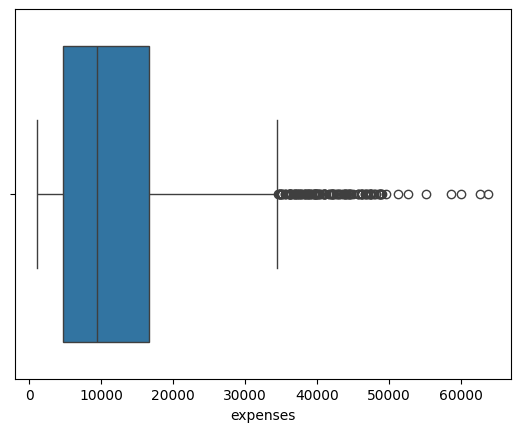

In [ ]:
#VERIFICANDO A EXISTENCIA DE OUTLIER
sns.boxplot(x=df['expenses'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 73.1+ KB


In [126]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [152]:
#RELAÇÃO PARA IDENTIFICAR A QUANTIDADE DE OUTLIER
Q1 = df_numeric['expenses'].quantile(0.25)
Q3 = df_numeric['expenses'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

11899.6275


In [153]:
#QUANTIDADE DE OUTLIER NA AMOSTRA
df_numeric_out = df_numeric['expenses'][((df_numeric['expenses'] < (Q1 - 1.5 * IQR)) | (df_numeric['expenses'] > (Q3 + 1.5 * IQR)))]
df_numeric_out.shape

(139,)

In [154]:
df_numeric_out.head()

14    39611.76
19    36837.47
23    37701.88
29    38711.00
30    35585.58
Name: expenses, dtype: float64

In [155]:
#EXCLUINDO OS OUTLIERS DA AMOSTRA
outlier = (df['expenses'] < (Q1 - 1.5 * IQR)) | (df['expenses'] > (Q3 + 1.5 * IQR))

filtered_df = df[-outlier]

filtered_df.shape

(1198, 5)

<Axes: xlabel='expenses'>

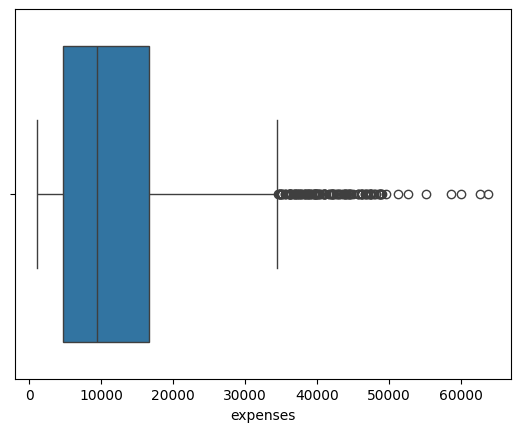

In [157]:
#VISUALIZANDO OS OUTLIERS NA AMOSTRA
sns.boxplot(x=df_numeric['expenses'])

<Axes: xlabel='expenses'>

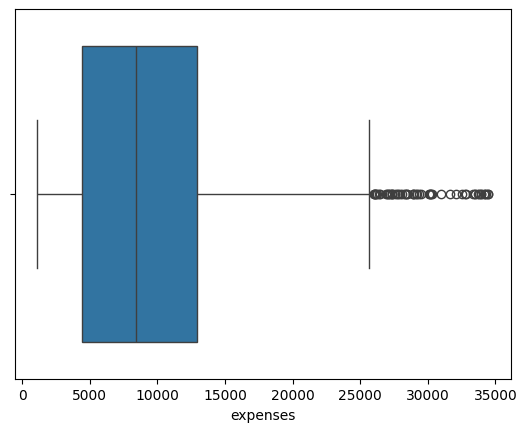

In [158]:
#VISUALIZANDO A AMOSTRA APÓS A REMOÇÃO DE ALGUNS OUTLIERS
sns.boxplot(x=filtered_df['expenses'])

###Analise os dados discrepantes e elimine-os caso necessário

###Plote os gráficos de:



*   Histograma
*   Heat Map
*   Scatterplot






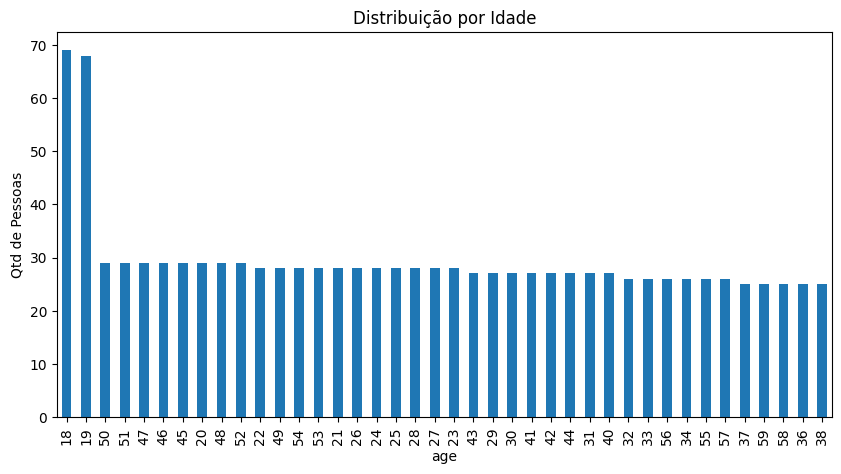

In [93]:
#FAZENDO A RELAÇÃO ENTRE IDADE E QUANTIDADE DE AMOSTRA (VALUE_COUNTS)

df.age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribuição por Idade")
plt.ylabel('Qtd de Pessoas')
plt.xlabel('age');

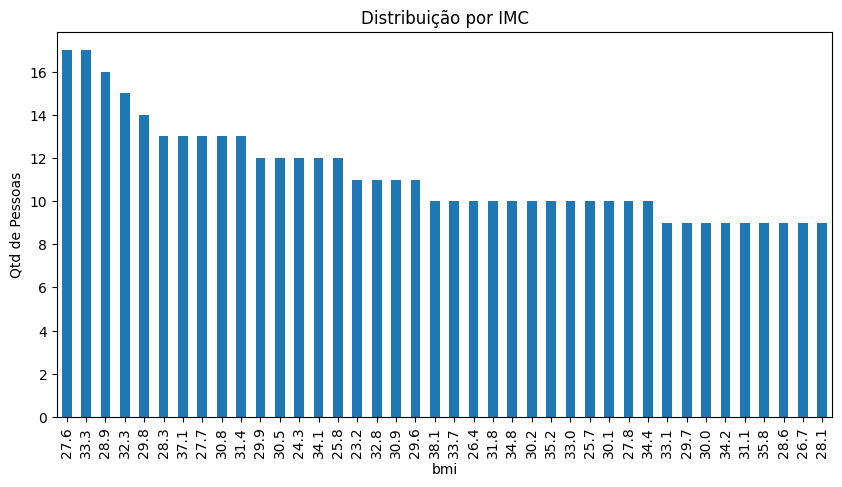

In [94]:
#FAZENDO A RELAÇÃO ENTRE IMC E QUANTIDADE DE AMOSTRA (VALUE_COUNTS)

df.bmi.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribuição por IMC")
plt.ylabel('Qtd de Pessoas')
plt.xlabel('bmi');

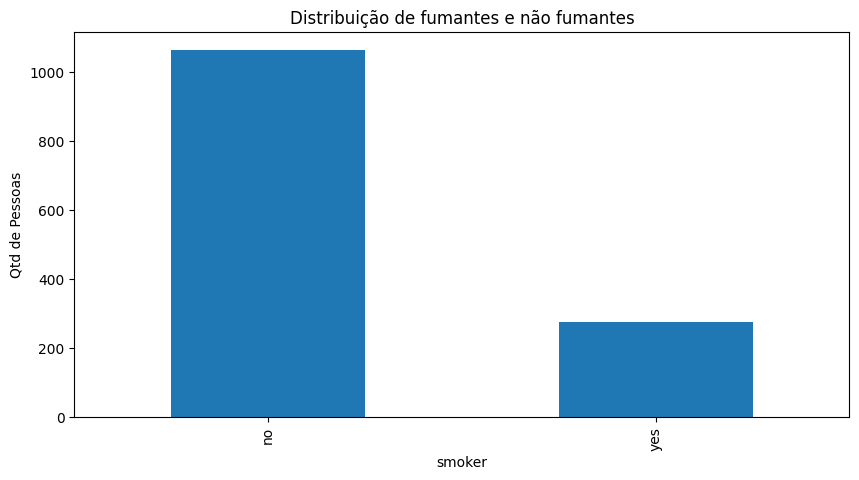

In [95]:
#FAZENDO A RELAÇÃO ENTRE FUMANTE E QUANTIDADE DE AMOSTRA (VALUE_COUNTS)

df.smoker.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribuição de fumantes e não fumantes")
plt.ylabel('Qtd de Pessoas')
plt.xlabel('smoker');

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


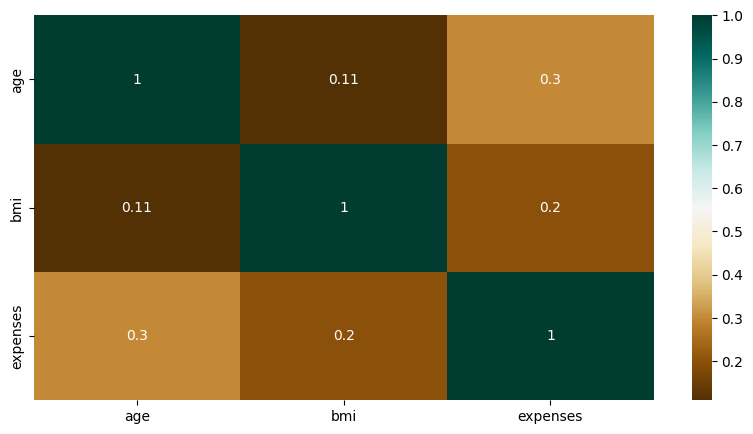

In [117]:
plt.figure(figsize=(10,5))
c= df_numeric.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

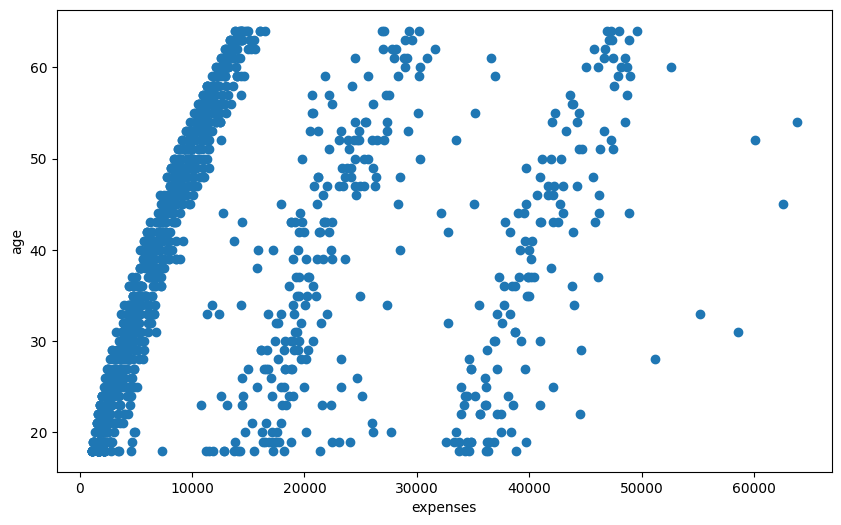

In [121]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['expenses'], df['age'])
ax.set_xlabel('expenses')
ax.set_ylabel('age')
plt.show()

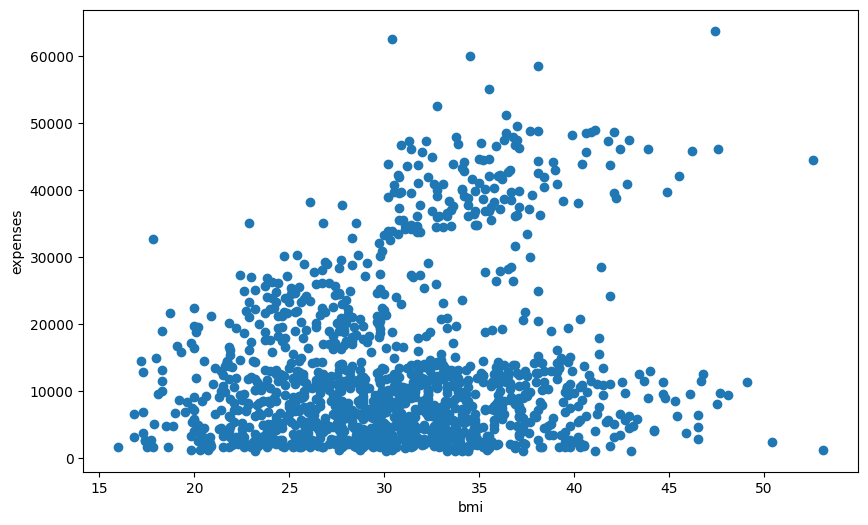

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['bmi'], df['expenses'])
ax.set_xlabel('bmi')
ax.set_ylabel('expenses')
plt.show()

**Dica: escolha as variáveis que quiser testar para criar os gráficos, exercite o pensamento crítico/de negócio**